# TASK-1 "Perform Data Cleaning

Clean a dataset by removing missing values

and outliers.

In [1]:
# FILE NO.1 "TEST TABLE"

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [8]:
dataset = pd.read_csv(r"D:\TASK\test.csv") # IMPORT FILE

In [9]:
dataset.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [10]:
dataset.shape

(418, 11)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [12]:
dataset.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
dataset.isnull().sum() # FIND NULL VALUES

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
dataset["Age"].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413     NaN
414    39.0
415    38.5
416     NaN
417     NaN
Name: Age, Length: 418, dtype: float64>

In [15]:
dataset["Age"] = dataset["Age"].replace(np.nan,34.5) # REPLACE NULL VALUE WITH MEAN = 34.5

In [16]:
dataset.dropna(subset = ["Fare"], inplace = True)

In [17]:
dataset.drop(columns = ["Cabin"], inplace = True)

In [18]:
dataset.isnull().sum() # ALL NULL VALUE IS REMOVE

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# WE CAN SEE OUTLIERS WITH THE HELP OF BOXPLOT

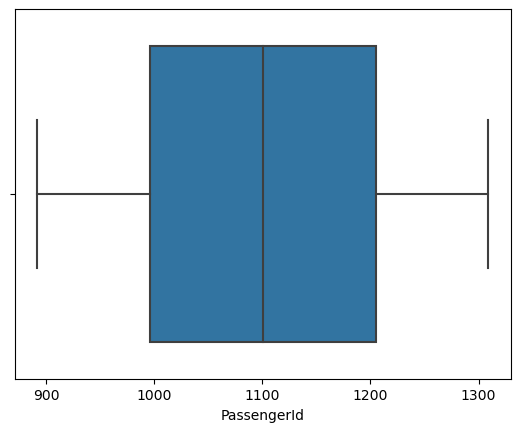

<Figure size 100x100 with 0 Axes>

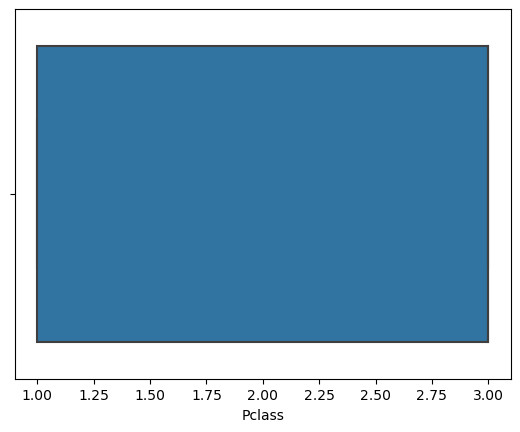

<Figure size 100x100 with 0 Axes>

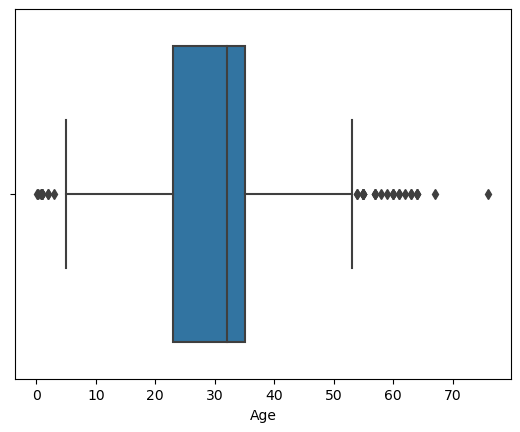

<Figure size 100x100 with 0 Axes>

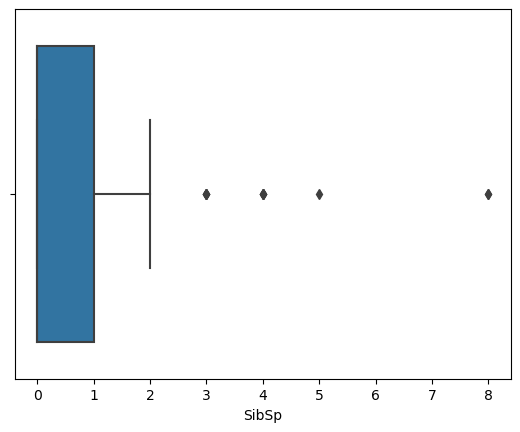

<Figure size 100x100 with 0 Axes>

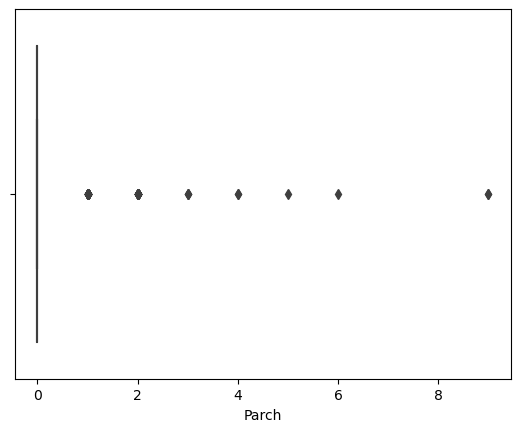

<Figure size 100x100 with 0 Axes>

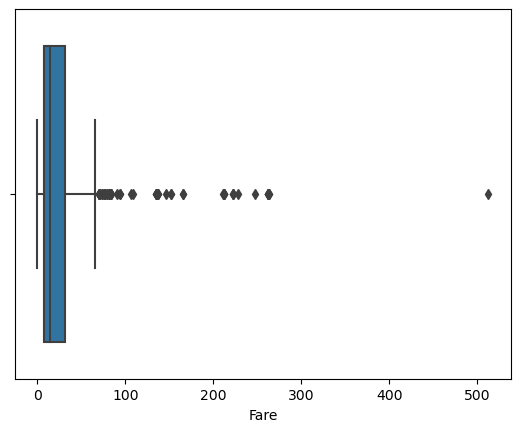

<Figure size 100x100 with 0 Axes>

(<Axes: xlabel='Fare'>, <Figure size 100x100 with 0 Axes>, None)

In [19]:
sns.boxplot( x = "PassengerId", data = dataset ),plt.figure(figsize = (1,1)),plt.show()

sns.boxplot( x = "Pclass", data = dataset ),plt.figure(figsize = (1,1)),plt.show()

sns.boxplot( x = "Age", data = dataset ),plt.figure(figsize = (1,1)),plt.show()

sns.boxplot( x = "SibSp", data = dataset ),plt.figure(figsize = (1,1)),plt.show()

sns.boxplot( x = "Parch", data = dataset ),plt.figure(figsize = (1,1)),plt.show()

sns.boxplot( x = "Fare", data = dataset ),plt.figure(figsize = (1,1)),plt.show()

# WE HAVE TO REMOVE OUTLIERS USING "IQR" METHOD

In [36]:
#REMOVE AGE OUTLIERS 
Q1 = dataset["Age"].quantile(0.25)
Q3 = dataset["Age"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = dataset[(dataset["Age"] <lower_bound) | (dataset["Age"] > upper_bound)]
print(outliers)

     PassengerId  Pclass                                               Name  \
2            894       2                          Myles, Mr. Thomas Francis   
13           905       2                               Howard, Mr. Benjamin   
20           912       1                             Rothschild, Mr. Martin   
48           940       1    Bucknell, Mrs. William Robert (Emma Eliza Ward)   
69           961       1                Fortune, Mrs. Mark (Mary McDougald)   
77           969       1  Cornell, Mrs. Robert Clifford (Malvina Helen L...   
81           973       1                                 Straus, Mr. Isidor   
89           981       2                        Wells, Master. Ralph Lester   
96           988       1  Cavendish, Mrs. Tyrell William (Julia Florence...   
114         1006       1             Straus, Mrs. Isidor (Rosalie Ida Blun)   
117         1009       3                    Sandstrom, Miss. Beatrice Irene   
142         1034       1                         Rye

In [37]:
#REMOVE FARE OUTLIERS

Q1 = dataset["Fare"].quantile(0.25)
Q3 = dataset["Fare"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = dataset[(dataset["Fare"] <lower_bound) | (dataset["Fare"] > upper_bound)]
print(outliers)

     PassengerId  Pclass                                               Name  \
12           904       1      Snyder, Mrs. John Pillsbury (Nelle Stevenson)   
24           916       1    Ryerson, Mrs. Arthur Larned (Emily Maria Borie)   
48           940       1    Bucknell, Mrs. William Robert (Emma Eliza Ward)   
53           945       1                         Fortune, Miss. Ethel Flora   
59           951       1                        Chaudanson, Miss. Victorine   
64           956       1                        Ryerson, Master. John Borie   
69           961       1                Fortune, Mrs. Mark (Mary McDougald)   
74           966       1                               Geiger, Miss. Amalie   
75           967       1                                 Keeping, Mr. Edwin   
81           973       1                                 Straus, Mr. Isidor   
96           988       1  Cavendish, Mrs. Tyrell William (Julia Florence...   
114         1006       1             Straus, Mrs. Is

In [39]:
#REMOVE SIBSP OUTLIERS

Q1 = dataset["SibSp"].quantile(0.25)
Q3 = dataset["SibSp"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = dataset[(dataset["SibSp"] <lower_bound) | (dataset["SibSp"] > upper_bound)]
print(outliers)

     PassengerId  Pclass                                    Name     Sex  \
53           945       1              Fortune, Miss. Ethel Flora  female   
55           947       3                    Rice, Master. Albert    male   
140         1032       3             Goodwin, Miss. Jessie Allis  female   
145         1037       3               Vander Planke, Mr. Julius    male   
154         1046       3            Asplund, Master. Filip Oscar    male   
188         1080       3                         Sage, Miss. Ada  female   
214         1106       3  Andersson, Miss. Ida Augusta Margareta  female   
360         1252       3             Sage, Master. William Henry    male   
379         1271       3             Asplund, Master. Carl Edgar    male   
389         1281       3             Palsson, Master. Paul Folke    male   
394         1286       3                Kink-Heilmann, Mr. Anton    male   

      Age  SibSp  Parch    Ticket      Fare Embarked  
53   28.0      3      2     1995

In [ ]:
# FILE NO. 2 [ TRAIN TABLE ] 

In [23]:
dataset2 = pd.read_csv(r"D:\TASK\train.csv") # IMPORT FILE

In [24]:
dataset2.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [25]:
dataset2.shape

(891, 12)

In [27]:
dataset2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [28]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
dataset2.isnull().sum() # FIND NULL VALUE IN DATASET2

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
dataset2["Age"].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64>

In [31]:
dataset2["Age"] = dataset2["Age"].replace(np.nan,22.0) # REPLACE NULL VALUE WITH MEAN = 22.0

In [32]:
dataset2.drop(columns = ["Cabin"], inplace = True)

In [33]:
dataset2.dropna(subset = ["Embarked"], inplace = True)

In [34]:
dataset2.isnull().sum() #REMOVE ALL NULL VALUES

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# WE WILL SEE OUTLIERS WITH THE HELP OF BOXPLOT

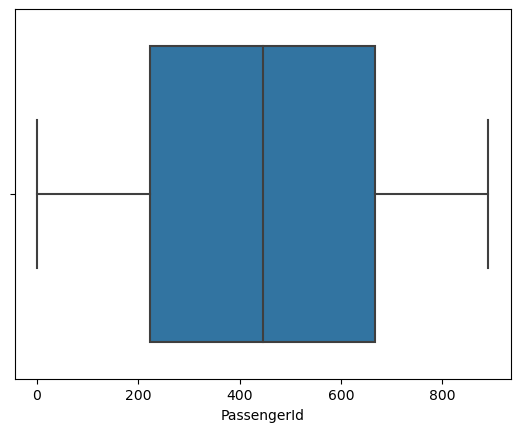

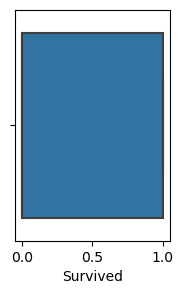

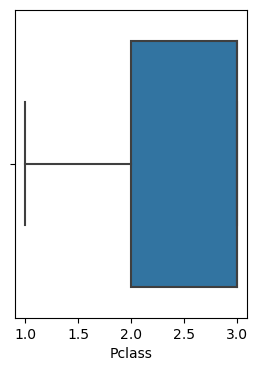

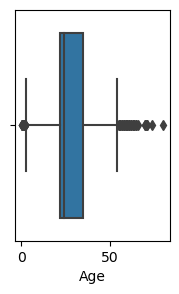

<Figure size 200x300 with 0 Axes>

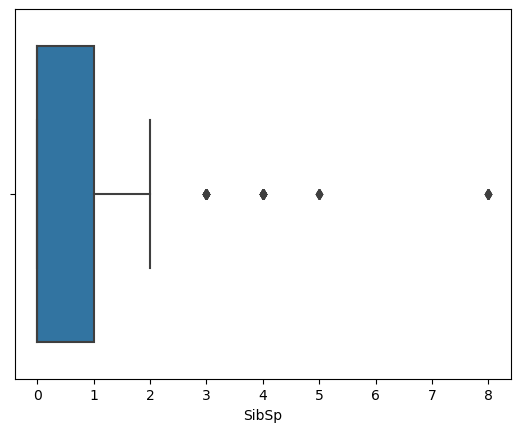

<Figure size 200x300 with 0 Axes>

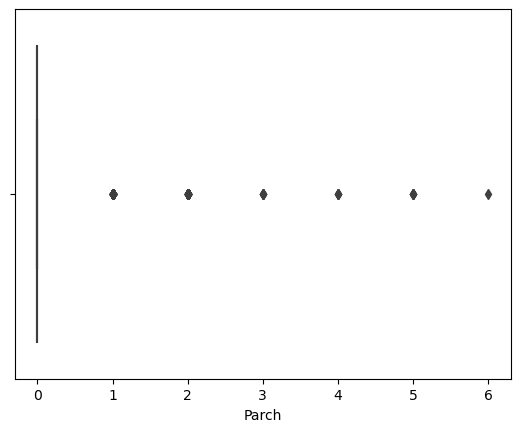

<Figure size 200x300 with 0 Axes>

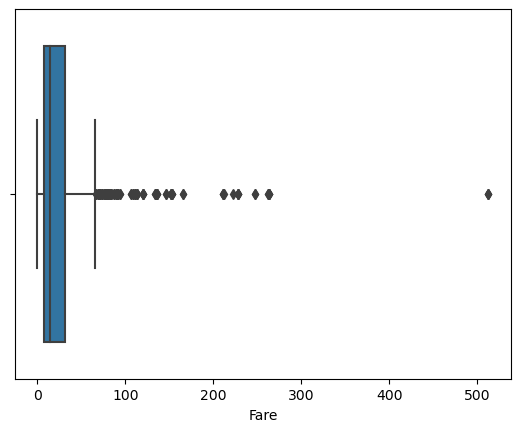

<Figure size 200x300 with 0 Axes>

(<Axes: xlabel='Fare'>, <Figure size 200x300 with 0 Axes>, None)

In [35]:
sns.boxplot(x = "PassengerId", data = dataset2),plt.figure(figsize = (2,3)),plt.show

sns.boxplot(x = "Survived", data = dataset2),plt.figure(figsize = (3,4)),plt.show

sns.boxplot(x = "Pclass", data = dataset2),plt.figure(figsize =(2,3)),plt.show

sns.boxplot(x = "Age", data = dataset2),plt.figure(figsize = (2,3)),plt.show()

sns.boxplot(x = "SibSp", data = dataset2),plt.figure(figsize = (2,3)),plt.show()

sns.boxplot(x = "Parch", data = dataset2),plt.figure(figsize = (2,3)),plt.show()

sns.boxplot(x = "Fare", data = dataset2),plt.figure(figsize = (2,3)),plt.show()

# WE HAVE TO REMOVE OUTLIERS USING "IQR" METHOD

In [ ]:
# REMOVE AGE OUTLIERS 

In [40]:
Q1 = dataset2["Age"].quantile(0.25)
Q3 = dataset2["Age"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = dataset2[(dataset2["Age"]< lower_bound) | (dataset2["Age"] > upper_bound)]
print(outliers)

     PassengerId  Survived  Pclass  \
7              8         0       3   
11            12         1       1   
15            16         1       2   
16            17         0       3   
33            34         0       2   
..           ...       ...     ...   
824          825         0       3   
827          828         1       2   
831          832         1       2   
851          852         0       3   
879          880         1       1   

                                              Name     Sex    Age  SibSp  \
7                   Palsson, Master. Gosta Leonard    male   2.00      3   
11                        Bonnell, Miss. Elizabeth  female  58.00      0   
15                Hewlett, Mrs. (Mary D Kingcome)   female  55.00      0   
16                            Rice, Master. Eugene    male   2.00      4   
33                           Wheadon, Mr. Edward H    male  66.00      0   
..                                             ...     ...    ...    ...   
824        

In [ ]:
# REMOVE SIBSP OUTLIERS

In [41]:
Q1 = dataset2["SibSp"].quantile(0.25)
Q3 = dataset2["SibSp"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = dataset2[(dataset2["SibSp"] < lower_bound) | (dataset2["SibSp"] > upper_bound)]
print(outliers)

     PassengerId  Survived  Pclass  \
7              8         0       3   
16            17         0       3   
24            25         0       3   
27            28         0       1   
50            51         0       3   
59            60         0       3   
63            64         0       3   
68            69         1       3   
71            72         0       3   
85            86         1       3   
88            89         1       1   
119          120         0       3   
159          160         0       3   
164          165         0       3   
171          172         0       3   
176          177         0       3   
180          181         0       3   
182          183         0       3   
201          202         0       3   
229          230         0       3   
233          234         1       3   
261          262         1       3   
266          267         0       3   
278          279         0       3   
324          325         0       3   
341         

In [ ]:
# REMOVE FARE OUTLIERS

In [42]:
Q1 = dataset2["Fare"].quantile(0.25)
Q3 = dataset2["Fare"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 *IQR
upper_bound = Q3 + 1.5 *IQR

outliers = dataset2[(dataset2["Fare"] < lower_bound) | (dataset2["Fare"] > upper_bound)]
print(outliers)

     PassengerId  Survived  Pclass  \
1              2         1       1   
27            28         0       1   
31            32         1       1   
34            35         0       1   
52            53         1       1   
..           ...       ...     ...   
846          847         0       3   
849          850         1       1   
856          857         1       1   
863          864         0       3   
879          880         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
27                      Fortune, Mr. Charles Alexander    male  19.0      3   
31      Spencer, Mrs. William Augustus (Marie Eugenie)  female  22.0      1   
34                             Meyer, Mr. Edgar Joseph    male  28.0      1   
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.0      1   
..                                                 ...     ...   ... 

# TASK-1 IS DONE

# TASK - 2 "Calculate summary statistics
Calculate summary statistics (mean, median,

mode, standard deviation) for a dataset

In [ ]:
# FILE NO.1 "TEST TABLE"

In [43]:
dataset.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,S


In [44]:
dataset.shape

(417, 10)

In [45]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Pclass       417 non-null    int64  
 2   Name         417 non-null    object 
 3   Sex          417 non-null    object 
 4   Age          417 non-null    float64
 5   SibSp        417 non-null    int64  
 6   Parch        417 non-null    int64  
 7   Ticket       417 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     417 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 35.8+ KB


In [47]:
dataset.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [48]:
dataset.isnull().sum() #NO NULL VALUES BECAUSE WE ARE ALREADY CLEAN DATA

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# summary of statistics

In [49]:
dataset.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,1100.635492,2.263789,31.071942,0.448441,0.393285,35.627188
std,120.923774,0.842077,12.683563,0.897568,0.982419,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1101.000000,3.000000,32.000000,0.000000,0.000000,14.454200
75%,1205.000000,3.000000,35.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [50]:
# FILE NO.2 "TRAIN TABLE"

In [51]:
dataset2.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,22.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [53]:
dataset2.shape

(889, 11)

In [55]:
dataset2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [ ]:
dataset2.info()

In [56]:
dataset2.isnull().sum() # NO NULL VALUES

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# summary of statistics

In [57]:
dataset2.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,28.120551,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,13.322956,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# TASK - 2 IS DONE

# TASK - 3 "Visualization using Histogram
Create a histogram or bar chart to visualize

the distribution of data in a dataset"

In [62]:
dataset3 = pd.read_csv(r"D:\TASK\TASK3\Iris.csv") # IMPORT DATA

In [63]:
dataset3.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [64]:
dataset3.shape

(150, 6)

In [66]:
dataset3.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [67]:
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [68]:
dataset3.isnull().sum() #NO NULL VALUES

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
# GRAPH = HISTOGRAM OF "SepalLengthCm"

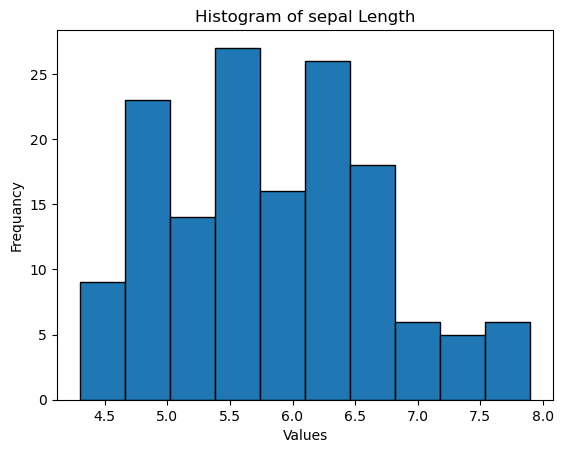

In [69]:
plt.hist(dataset3["SepalLengthCm"], bins = 10, edgecolor = "black")
plt.title("Histogram of sepal Length")
plt.xlabel("Values")
plt.ylabel("Frequancy")
plt.show()      

In [ ]:
# GRAPH = HISTOGRAM OF "SepalWidthCm"

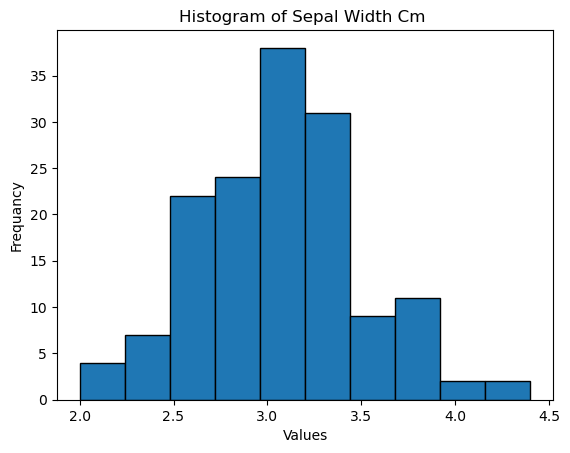

In [70]:
plt.hist(dataset3["SepalWidthCm"], bins = 10, edgecolor = "black")
plt.title("Histogram of Sepal Width Cm ")
plt.xlabel("Values")
plt.ylabel("Frequancy")
plt.show()

In [ ]:
# GRAPH = HISTOGRAM OF "PetalLengthCm"

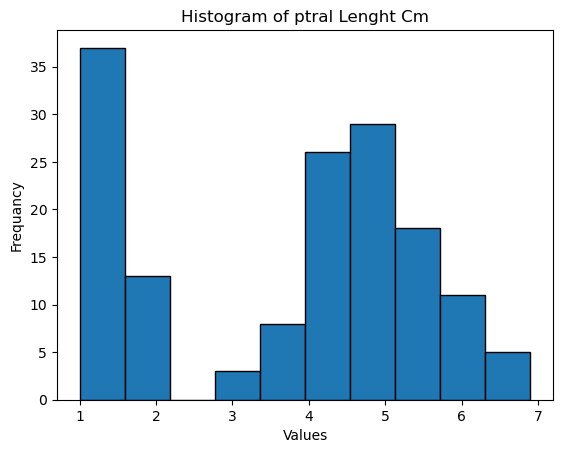

In [71]:
plt.hist(dataset3["PetalLengthCm"],bins = 10, edgecolor = "black")
plt.xlabel("Values")
plt.ylabel("Frequancy")
plt.title("Histogram of ptral Lenght Cm")
plt.show()

In [ ]:
# GRAPH = HISTOPGRAM OF "PetalWidthCm"

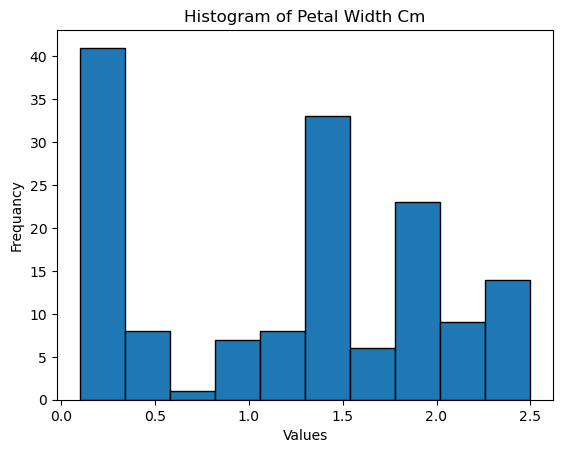

In [72]:
plt.hist(dataset3["PetalWidthCm"], bins = 10, edgecolor = "black")
plt.title("Histogram of Petal Width Cm")
plt.xlabel("Values")
plt.ylabel("Frequancy")
plt.show()

In [73]:
# GRAPH = HISTOGRAM OF "Species"

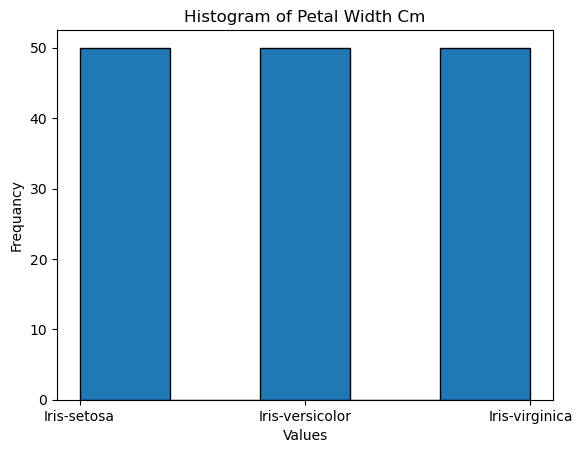

In [74]:
plt.hist(dataset3["Species"], bins = 5, edgecolor = "black")
plt.title("Histogram of Petal Width Cm")
plt.xlabel("Values")
plt.ylabel("Frequancy")
plt.show()

In [75]:
# TASK - 3 DONE

# ALL TASK ARE COMPLETED